# Scapulo-Humeral Computation
- [github link](https://github.com/romainmartinez/SHR)

In [1]:
# Common imports
import scipy.io as sio
import numpy as np
import spm1d

# Figures
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# to make this notebook's output stable across runs
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
DATA_PATH = './data/'
DATA_FORMAT = 'data_with_angles'

AREA = np.arange(1, 100)

## 0. import data

In [3]:
mat = sio.loadmat(f'{DATA_PATH}{DATA_FORMAT}.mat')['data']

In [4]:
y, TH, weight, participants, sex = [mat[i][0][0] for i in ['y', 'TH', 'weight', 'participants', 'sex']]

# keep only AREA
y = y[:, AREA].copy()

# reshape to vector
weight, participants, sex = [i.flatten() for i in [weight, participants, sex]]

In [5]:
# replace nan by mean of same sex/weight
for isex in np.unique(sex):
    for iweight in np.unique(weight):
        idx = ((sex == isex) & (weight == iweight)).flatten()
        mean_vector = np.nanmean(y[idx, :], axis=0)
        y[idx, :] = np.where(np.isnan(y[idx, :]), mean_vector, y[idx, :])

## 1. stats

In [6]:
alpha = 0.05
iterations = 10000

a_spm = spm1d.stats.nonparam.anova2(y, sex, weight)
a_spmi = a_spm.inference(alpha, iterations=iterations)
print(a_spmi)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(11, 8.5))

a_spmi.plot(plot_threshold_label=True, plot_p_values=True, autoset_ylim=True)
plt.show()

fig.savefig(f'./share/fig/spm.pdf', transparent=True)

In [ ]:
a_spmi.print_verbose()

In [ ]:
a_spmi[0].clusters

In [ ]:
a_spmi[1].clusters

In [ ]:
for i in range(len(a_spmi)):
    fig, ax = plt.subplots(figsize=(11, 8.5))

    z = a_spmi[i].z

    signi = np.abs(a_spmi[i].z) >= a_spmi[i].zstar

    z[~signi] = np.nan

    plot_array = np.ma.masked_where(np.isnan(z),z).reshape(1, -1)

    plt.pcolor(plot_array, cmap='viridis', antialiased=True,
               vmin=8, vmax=20)

    plt.colorbar(pad=.08)

    ax.xaxis.set_ticks(np.linspace(0, 100, num=6))

    fig.tight_layout()
    plt.show()

    fig.savefig(f'./share/fig/{a_spmi[i].effect}.pdf', transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize=(11, 8.5))

spm1d.plot.plot_mean_sd(y[(sex == 1) & (weight == 6), :],
                        linecolor='b', facecolor='b', alpha=.3)
spm1d.plot.plot_mean_sd(y[(sex == 1) & (weight == 12), :],
                        linecolor='b', linestyle='--', facecolor='b', alpha=.3)
spm1d.plot.plot_mean_sd(y[(sex == 2) & (weight == 6), :],
                        linecolor='r', facecolor='r', alpha=.3)
spm1d.plot.plot_mean_sd(y[(sex == 2) & (weight == 12), :],
                        linecolor='r', linestyle='--', facecolor='r', alpha=.3)

ax.set_ylabel('Scapulo-humeral rhythm')
ax.set_xlabel('Normalized time (% trial)')
ax.xaxis.set_ticks(np.linspace(0, 100, num=6))

sns.despine(offset=10, trim=True)
fig.tight_layout()

fig.savefig(f'./share/fig/rhythm.pdf', transparent=True)

plt.show()

In [ ]:
N = 58

fig, ax = plt.subplots(figsize=(11, 8.5))

mean_men_6 = np.mean(y[(sex == 1) & (weight == 6), :], axis=0)
std_men_6 = np.std(y[(sex == 1) & (weight == 6), :], axis=0)
mean_men_12 = np.mean(y[(sex == 1) & (weight == 12), :], axis=0)
std_men_12 = np.std(y[(sex == 1) & (weight == 12), :], axis=0)

mean_women_6 = np.mean(y[(sex == 2) & (weight == 6), :], axis=0)
std_women_6 = np.std(y[(sex == 2) & (weight == 6), :], axis=0)
mean_women_12 = np.mean(y[(sex == 2) & (weight == 12), :], axis=0)
std_women_12 = np.std(y[(sex == 2) & (weight == 6), :], axis=0)

plt.plot(mean_men_6, color='#3498db')
plt.plot(mean_men_6 - std_men_6/np.sqrt(N/2), color='#3498db', linestyle='--')
plt.plot(mean_men_6 + std_men_6/np.sqrt(N/2), color='#3498db', linestyle='--')

plt.plot(mean_women_6, color='#e74c3c')
plt.plot(mean_women_6 - std_women_6/np.sqrt(N/2), color='#e74c3c', linestyle='--')
plt.plot(mean_women_6 + std_women_6/np.sqrt(N/2), color='#e74c3c', linestyle='--')



plt.plot(mean_men_12, color='#2ecc71')
plt.plot(mean_men_12 - std_men_12/np.sqrt(N/2), color='#2ecc71', linestyle='--')
plt.plot(mean_men_12 + std_men_12/np.sqrt(N/2), color='#2ecc71', linestyle='--')

plt.plot(mean_women_12, color='#9b59b6')
plt.plot(mean_women_12 - std_women_12/np.sqrt(N/2), color='#9b59b6', linestyle='--')
plt.plot(mean_women_12 + std_women_12/np.sqrt(N/2), color='#9b59b6', linestyle='--')


ax.set_ylabel('Scapulo-humeral rhythm')
ax.set_xlabel('Normalized time (% trial)')
ax.xaxis.set_ticks(np.linspace(0, 100, num=6))
ax.yaxis.set_ticks(np.linspace(0.5, 4, num=8))

sns.despine(offset=10, trim=True)
fig.tight_layout()

fig.savefig(f'./share/fig/rhythm.pdf', transparent=True)

plt.show()

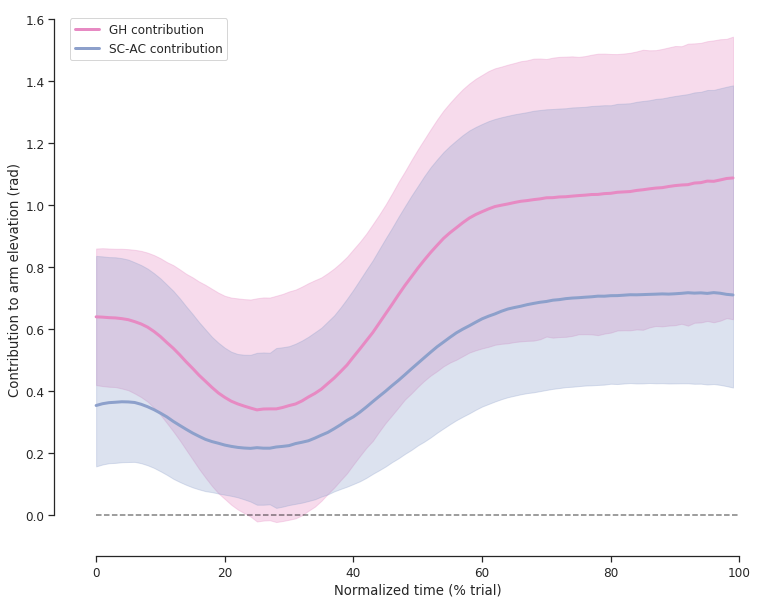

In [9]:
contrib_gh, contrib_scac = [mat[i][0][0] for i in ['contrib_gh', 'contrib_scac']]

colors = {
    'WR-EL': '#fc8d62ff',
    'GH': '#e78ac3ff',
    'SC-AC': '#8da0cbff',
    'RoB': '#66c2a5ff'
}

fig, ax = plt.subplots(figsize=(11, 8.5))

mean_contrib_gh = np.nanmean(contrib_gh, axis=0)
std_contrib_gh = np.nanstd(contrib_gh, axis=0)
mean_contrib_scac = np.nanmean(contrib_scac, axis=0)
std_contrib_scac = np.nanstd(contrib_scac, axis=0)

plt.plot(mean_contrib_gh, color=colors['GH'], label='GH contribution', linewidth=3)
ax.fill_between(np.arange(0, 100), y1=mean_contrib_gh - std_contrib_gh, y2=mean_contrib_gh + std_contrib_gh, color=colors['GH'], alpha=.3)

plt.plot(mean_contrib_scac, color=colors['SC-AC'], label='SC-AC contribution', linewidth=3)
ax.fill_between(np.arange(0, 100), y1=mean_contrib_scac - std_contrib_scac, y2=mean_contrib_gh + std_contrib_scac, color=colors['SC-AC'], alpha=.3)

plt.plot([0, 100], [0, 0], linestyle='--', alpha=.5, color='k')

ax.set_ylabel('Contribution to arm elevation (rad)')
ax.set_xlabel('Normalized time (% trial)')
ax.xaxis.set_ticks(np.linspace(0, 100, num=6))
# ax.yaxis.set_ticks(np.linspace(0.5, 4, num=8))
ax.legend(loc='upper left')

sns.despine(offset=10, trim=True)
fig.tight_layout()

fig.savefig(f'./share/fig/rhythm.pdf', transparent=True)

plt.show()